In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

In [2]:
df_Algeria = pd.read_csv('C:\Projects\Forest-Fires\Algeria\data\Algerian_forest_fires_dataset_CLEANED.csv')

In [3]:
df_Algeria.drop(['day','month','year'], axis=1, inplace=True)

In [4]:
df_Algeria['Classes']= np.where(df_Algeria['Classes']== 'not fire',0,1)

In [5]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [6]:
def scaler_standard(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled

# 6. Model Selection For Classification
* Now start the model selection process where we try out bunch of different models. 
* Choose some and fine tune and Finalize one model

## 6.1 Import Libraries

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

### 6.2 Data Preprocessing for Classification

In [8]:
X = df_Algeria.drop('Classes',axis=1)
y= df_Algeria['Classes']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=36)
print(X_train.shape, X_test.shape)

(170, 11) (73, 11)


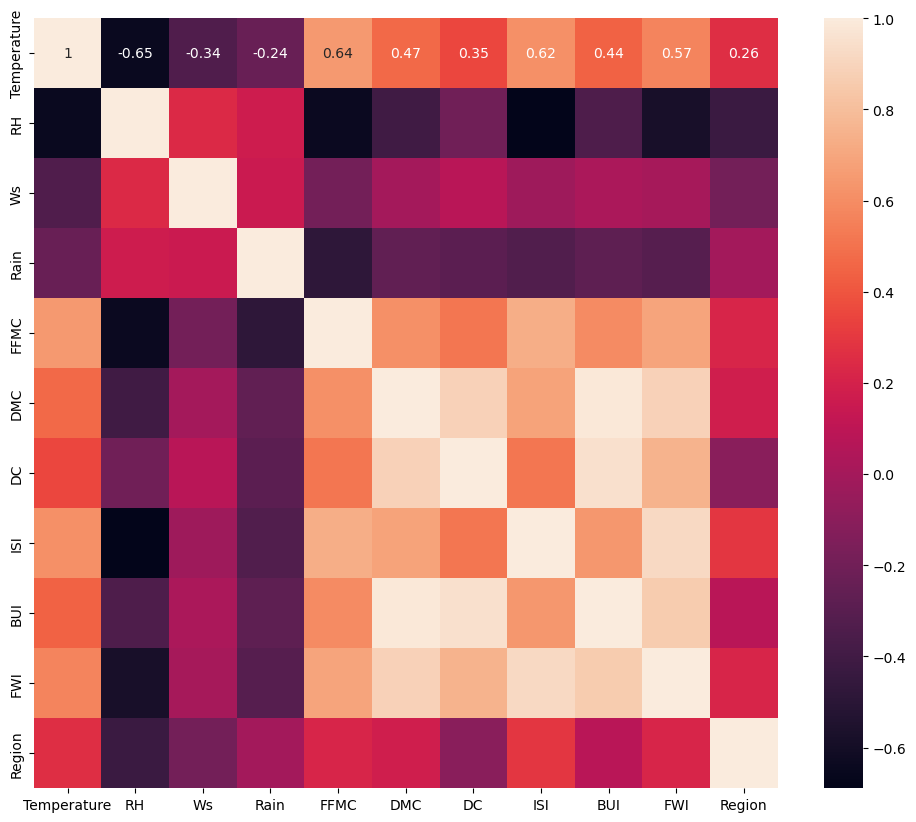

In [10]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True)
plt.show()

In [11]:
corr_features = correlation(X_train, 0.75)

In [12]:
corr_features

{'BUI', 'DC', 'FWI'}

In [13]:
X_train.drop(corr_features,axis=1, inplace=True)
X_test.drop(corr_features,axis=1, inplace=True)
X_train.shape, X_test.shape

((170, 8), (73, 8))

In [14]:
X_train_scaled, X_test_scaled = scaler_standard(X_train, X_test)

## 6.3 Logistic Regression

In [15]:
# Import Logistic Regression to Train from SKlearn
loreg = LogisticRegression(max_iter=200)
loreg.fit(X_train_scaled,y_train)
loreg_pred = loreg.predict(X_test_scaled)
score = accuracy_score(y_test,loreg_pred)
cr = classification_report(y_test,loreg_pred)

print("Logistic Regression")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

Logistic Regression
Accuracy Score value: 0.9589
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        25
           1       0.98      0.96      0.97        48

    accuracy                           0.96        73
   macro avg       0.95      0.96      0.95        73
weighted avg       0.96      0.96      0.96        73



| Metrics     | Definition  |
| ----------- | ----------- |
| Precision      | Precision is defined as the ratio of true positives to the sum of true and false positives.       |
| Recall   | Recall is defined as the ratio of true positives to the sum of true positives and false negatives.        |
| F1 Score  | The F1 is the weighted harmonic mean of precision and recall. The closer the value of the F1 score is to 1.0, the better the expected performance of the model is.   |

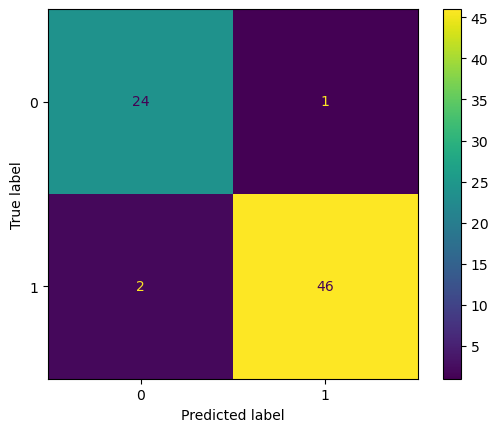

In [16]:
loreg_cm = ConfusionMatrixDisplay.from_estimator(loreg, X_test_scaled, y_test)

## 6.4 Decision Tree

In [17]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train_scaled,y_train)
dtc_pred = dtc.predict(X_test_scaled)
score = accuracy_score(y_test,dtc_pred)
cr = classification_report(y_test,dtc_pred)

print("Decision Tree")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

Decision Tree
Accuracy Score value: 0.9726
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        25
           1       1.00      0.96      0.98        48

    accuracy                           0.97        73
   macro avg       0.96      0.98      0.97        73
weighted avg       0.97      0.97      0.97        73



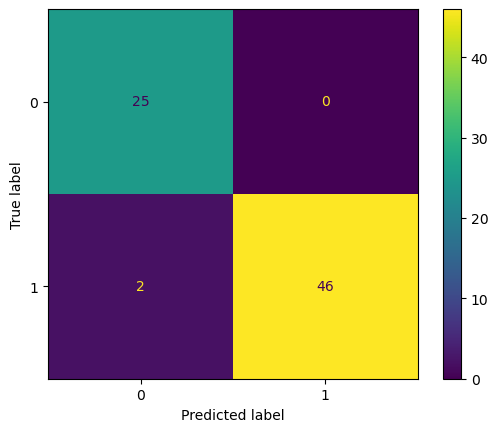

In [18]:
dt_cm = ConfusionMatrixDisplay.from_estimator(dtc, X_test_scaled, y_test)

## 6.5 Random Forest

In [19]:
rfc = RandomForestClassifier()
rfc.fit(X_train_scaled,y_train)
rfc_pred = rfc.predict(X_test_scaled)
score = accuracy_score(y_test,rfc_pred)
cr = classification_report(y_test,rfc_pred)

print("Random Forest")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

Random Forest
Accuracy Score value: 0.9589
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        25
           1       1.00      0.94      0.97        48

    accuracy                           0.96        73
   macro avg       0.95      0.97      0.96        73
weighted avg       0.96      0.96      0.96        73



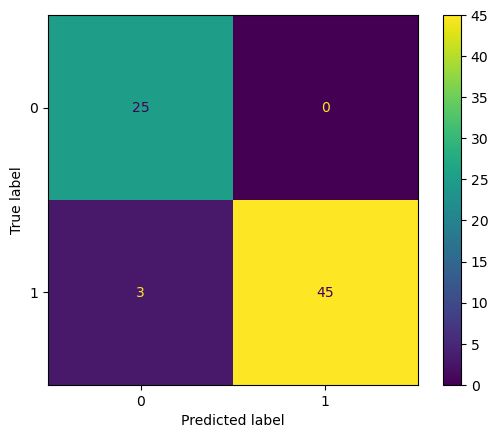

In [20]:
rf_cm = ConfusionMatrixDisplay.from_estimator(rfc, X_test_scaled, y_test)

## 6.6 K_Neighbors Classifier

In [21]:
# KNeighborsClassifier to Train from SKlearn
knnc = RandomForestClassifier()
knnc.fit(X_train_scaled,y_train)
knn_pred = knnc.predict(X_test_scaled)
score = accuracy_score(y_test,knn_pred)
cr = classification_report(y_test,knn_pred)

print("KNeighbors Classifier")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

KNeighbors Classifier
Accuracy Score value: 0.9589
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        25
           1       1.00      0.94      0.97        48

    accuracy                           0.96        73
   macro avg       0.95      0.97      0.96        73
weighted avg       0.96      0.96      0.96        73



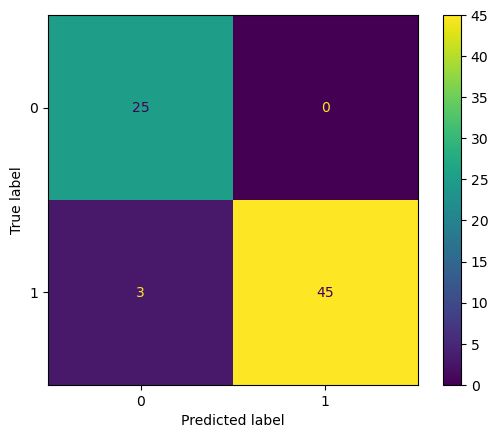

In [22]:
knn_cm = ConfusionMatrixDisplay.from_estimator(knnc, X_test_scaled, y_test)

## 6.7 XGboost Model 

In [23]:
# Import KNeighborsClassifier to Train from SKlearn
xgb = XGBClassifier()
xgb.fit(X_train_scaled,y_train)
xgb_pred = xgb.predict(X_test_scaled)
score = accuracy_score(y_test, xgb_pred)
cr = classification_report(y_test, xgb_pred)

print("XGboost Classifier")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

XGboost Classifier
Accuracy Score value: 0.9726
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        25
           1       1.00      0.96      0.98        48

    accuracy                           0.97        73
   macro avg       0.96      0.98      0.97        73
weighted avg       0.97      0.97      0.97        73



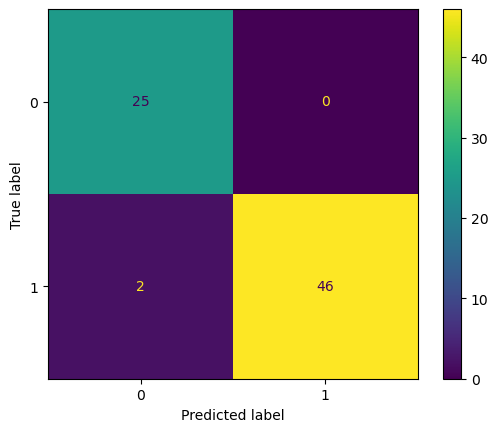

In [24]:
xgb_cm = ConfusionMatrixDisplay.from_estimator(xgb, X_test_scaled, y_test)

**Accuracy score Results Summary**

| Models     | Accuracy score  |
| ----------- | ----------- |
| XGboost classifier     | 97.26 % |
| Decision Tree Classifier  | 97.26 % |
| Logistic Regression Accurracy  | 95.89 % |
| KNeighbors Classifier  | 95.89 %|
| Random Forest Classifier  | 95.89 % |

## 6.8 HyperParameter Tuning

### **XGboost classifier Tuning**

In [25]:
params={
 "learning_rate"    : (np.linspace(0,10, 100)) ,
 "max_depth"        : (np.linspace(1,50, 25,dtype=int)),
 "min_child_weight" : [1, 3, 5, 7],
 "gamma"            : [0.0, 0.1, 0.2 , 0.3, 0.4],
 "colsample_bytree" : [0.3, 0.4, 0.5 , 0.7]}
Random_xgb = RandomizedSearchCV(xgb, params, cv = 10,n_jobs = -1)
Random_xgb.fit(X_train_scaled, y_train).best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1.6161616161616161,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [26]:
best_xgb = Random_xgb.best_estimator_
best_xgb.score(X_test_scaled,y_test)
bestxgb_pred = best_xgb.predict(X_test_scaled)
cr = classification_report(y_test,bestxgb_pred)
print("FINAL XGB")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

FINAL XGB
Accuracy Score value: 0.9726
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        25
           1       1.00      0.96      0.98        48

    accuracy                           0.97        73
   macro avg       0.96      0.98      0.97        73
weighted avg       0.97      0.97      0.97        73



### **Random Forest classifier Tuning**

In [27]:
params = {
    "n_estimators" : [90,100,115,130],
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features' : ['auto','log2']
}
random_rf = RandomizedSearchCV(rfc, params, cv = 10,n_jobs = -1)
random_rf.fit(X_train_scaled, y_train).best_estimator_

RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=4,
                       n_estimators=90)

In [28]:
best_rf = random_rf.best_estimator_
best_rf.score(X_test_scaled,y_test)
bestrf_pred = best_rf.predict(X_test_scaled)
cr = classification_report(y_test,bestrf_pred)
print("FINAL Random Forest")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

FINAL Random Forest
Accuracy Score value: 0.9726
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        25
           1       1.00      0.94      0.97        48

    accuracy                           0.96        73
   macro avg       0.95      0.97      0.96        73
weighted avg       0.96      0.96      0.96        73



## 7. Model Selection

### 7.1 Applying Stratified Kfold Cross-Validation to know the exact Mean CV Accuracy Score for all models

Implementing the concept of **StratifiedK fold sampling** in cross-validation ensures the training and test sets have the same proportion of the feature of interest as in the original dataset. Doing this with the target variable ensures good accuracy without error.

In [29]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
skfold = StratifiedKFold(n_splits= 10,shuffle= True,random_state= 36)

In [30]:
cv_xgb= cross_val_score(best_xgb,X,y,cv=skfold,scoring='accuracy').mean()
print('CV Score XGB Tuned {:.4f}'.format(cv_xgb))

CV Score XGB Tuned 0.9835


In [31]:
cv_rf=cross_val_score(rfc,X,y,cv=skfold,scoring="accuracy").mean()
print('CV Score Random Forest {:.4f}'.format(cv_rf))

CV Score Random Forest 0.9710


In [32]:
cv_lg=cross_val_score(loreg,X,y,cv=skfold,scoring="accuracy").mean()
print('CV Score Logistic Regression {:.4f}'.format(cv_lg))

CV Score Logistic Regression 0.9710


c:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [33]:
cv_dt =cross_val_score(dtc,X,y,cv= skfold,scoring="accuracy").mean()
print('CV Score Decision Tree {:.4f}'.format(cv_dt))

CV Score Decision Tree 0.9710


In [34]:
cv_knn =cross_val_score(knnc,X,y,cv=skfold,scoring="accuracy").mean()
print('CV Score KNN Classifier {:.4f}'.format(cv_knn))

CV Score KNN Classifier 0.9710


### 7.2 **CV Score score Results Summary**

| Models     | Accuracy score  |
| ----------- | ----------- |
| XGBoost Classifier     | 97.52 % |
| Random Forest  | 97.10 % |
| K Neighbors Classifier  | 97.10 %|
| Decision Tree Classifier  | 97.52 % |
| Logistic Regression  | 97.52 % |